# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

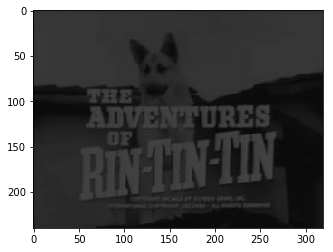

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

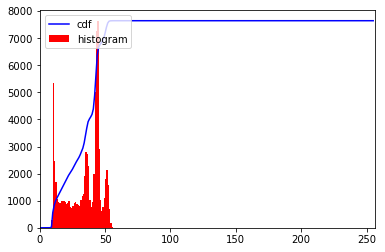

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

O histograma fornecido acima representa somente as faixas de cinza, e não as distribui corretamente pela faixa da escala de cinza. Assim posso dizer que não aproveita as faixas de cores.

In [8]:
np.set_printoptions(threshold=110)
equaz = rintin_gray
wide = (255/(rintin.max()-rintin.min()))
for i in range(rintin_gray.shape[0]) :
    for j in range (rintin_gray.shape[1]):
        equaz[i][j] = wide*(rintin_gray[i][j]-rintin_gray.min())
    
print(cv2.imwrite("equalizado.png",equaz))

True


In [9]:
hist,bins = np.histogram(equaz.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

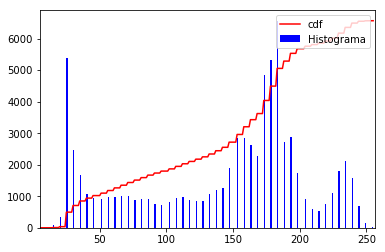

In [15]:
plt.plot(cdf_normalized, color = 'r')
plt.hist(equaz.flatten(),256,[0,256], color = 'b')
plt.xlim([equaz.flatten().min(),256])
plt.legend(('cdf','Histograma'), loc = 'upper right')
plt.show()

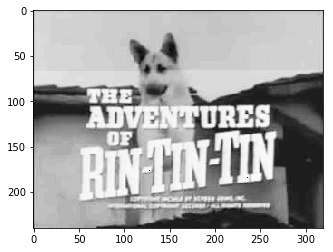

In [11]:
plt.imshow(equaz,cmap="Greys_r",vmin=0,vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


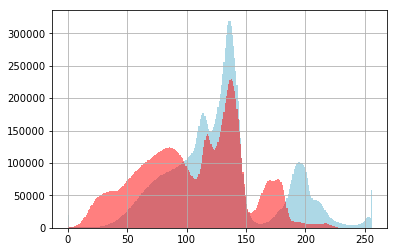

In [12]:
caixas = cv2.imread("hall_box_battery1.jpg")
caixasRGB = cv2.cvtColor(caixas, cv2.COLOR_BGR2RGB)
plt.hist(caixasRGB[:,:,0].flatten(),256,[0,256],color="lightblue",lw=0)
plt.hist(caixasRGB[:,:,2].flatten(),256,[0,256],color="r",lw=0,alpha=0.5)
plt.grid(True)

Não, pois não tendo os parametros do verde, o vermelho e o azul podem ser outras cores se o verde for diferente

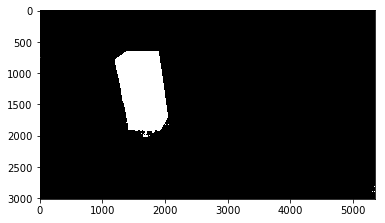

In [13]:
caixas = cv2.cvtColor(caixas,cv2.COLOR_BGR2HSV);
cor_menor = np.array([0, 50, 50])
cor_maior = np.array([8, 255, 255])
segmentado_cor = cv2.inRange(caixas, cor_menor, cor_maior)
cor_menor = np.array([172, 50, 50])
cor_maior = np.array([180, 255, 255])
segmentado_cor += cv2.inRange(caixas, cor_menor, cor_maior)
segmentado_cor = cv2.morphologyEx(segmentado_cor,cv2.MORPH_CLOSE,np.ones((7, 7)))

plt.imshow(segmentado_cor,cmap="Greys_r",vmin=0,vmax=255)